<a href="https://colab.research.google.com/github/anu091104/Anushka/blob/main/ML_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the dataset

In [ ]:
# Install required libraries
!pip install kaggle --quiet
!pip install category-encoders --quiet
!pip install textblob --quiet
!pip install nltk --quiet
!pip install scikit-learn matplotlib seaborn --quiet


In [ ]:
import pandas as pd
import numpy as np
import gc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from category_encoders import BinaryEncoder
import nltk
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
files.upload()  # <-- Upload kaggle.json file from your system


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anushkasri0904","key":"6898090b62a9403bfb59cc41e16d8c91"}'}

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"anushkasri0904","key":"6898090b62a9403bfb59cc41e16d8c91"}'}

In [ ]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d omermetinn/tweets-about-the-top-companies-from-2015-to-2020
!kaggle datasets download -d omermetinn/values-of-top-nasdaq-copanies-from-2010-to-2020
!unzip -o tweets-about-the-top-companies-from-2015-to-2020.zip -d data/
!unzip -o values-of-top-nasdaq-copanies-from-2010-to-2020.zip -d data/


Dataset URL: https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020
License(s): CC0-1.0
 93% 259M/278M [00:00<00:00, 606MB/s] 
100% 278M/278M [00:02<00:00, 118MB/s]
Dataset URL: https://www.kaggle.com/datasets/omermetinn/values-of-top-nasdaq-copanies-from-2010-to-2020
License(s): CC0-1.0
  0% 0.00/299k [00:00<?, ?B/s]
100% 299k/299k [00:00<00:00, 669MB/s]
Archive:  tweets-about-the-top-companies-from-2015-to-2020.zip
  inflating: data/Company.csv        
  inflating: data/Company_Tweet.csv  
  inflating: data/Tweet.csv          
Archive:  values-of-top-nasdaq-copanies-from-2010-to-2020.zip
  inflating: data/Company.csv        
  inflating: data/CompanyValues.csv  


In [ ]:
!pip install category-encoders --quiet


In [ ]:
import pandas as pd
import numpy as np
import gc
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from category_encoders import BinaryEncoder
import nltk
from textblob import TextBlob
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
!ls /content/data


Company.csv  Company_Tweet.csv	CompanyValues.csv  Tweet.csv


In [ ]:
!cat ~/.kaggle/kaggle.json


{"username":"anushkasri0904","key":"6898090b62a9403bfb59cc41e16d8c91"}

In [ ]:
!kaggle datasets download -d omermetinn/tweets-about-the-top-companies-from-2015-to-2020
!kaggle datasets download -d omermetinn/values-of-top-nasdaq-copanies-from-2010-to-2020


Dataset URL: https://www.kaggle.com/datasets/omermetinn/tweets-about-the-top-companies-from-2015-to-2020
License(s): CC0-1.0
tweets-about-the-top-companies-from-2015-to-2020.zip: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/omermetinn/values-of-top-nasdaq-copanies-from-2010-to-2020
License(s): CC0-1.0
values-of-top-nasdaq-copanies-from-2010-to-2020.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!ls /content/data


Company.csv  Company_Tweet.csv	CompanyValues.csv  Tweet.csv


In [ ]:
import pandas as pd

tweets = pd.read_csv("/content/data/Company.csv")          # or Company_Tweet.csv if that’s the name
stocks = pd.read_csv("/content/data/CompanyValues.csv")

print("Tweets shape:", tweets.shape)
print("Stocks shape:", stocks.shape)
tweets.head(), stocks.head()


In [ ]:
import pandas as pd

# Load the datasets
tweets = pd.read_csv("/content/data/Company_Tweet.csv")
stocks = pd.read_csv("/content/data/CompanyValues.csv")

# Optional: display some basic info
print("Tweets shape:", tweets.shape)
print("Stocks shape:", stocks.shape)

# Preview first few rows
tweets.head(), stocks.head()


Tweets shape: (4336445, 2)
Stocks shape: (17528, 7)


(             tweet_id ticker_symbol
 0  550803612197457920          AAPL
 1  550803610825928706          AAPL
 2  550803225113157632          AAPL
 3  550802957370159104          AAPL
 4  550802855129382912          AAPL,
   ticker_symbol    day_date  close_value    volume  open_value  high_value  \
 0          AAPL  2020-05-29       317.94  38399530      319.25      321.15   
 1          AAPL  2020-05-28       318.25  33449100      316.77      323.44   
 2          AAPL  2020-05-27       318.11  28236270      316.14      318.71   
 3          AAPL  2020-05-26       316.73  31380450      323.50      324.24   
 4          AAPL  2020-05-22       318.89  20450750      315.77      319.23   
 
    low_value  
 0     316.47  
 1     315.63  
 2     313.09  
 3     316.50  
 4     315.35  )

In [ ]:
import pandas as pd

tweets = pd.read_csv("/content/data/Company_Tweet.csv")
stocks = pd.read_csv("/content/data/CompanyValues.csv")

print("Tweets columns:\n", tweets.columns)
print("\nStocks columns:\n", stocks.columns)


Tweets columns:
 Index(['tweet_id', 'ticker_symbol'], dtype='object')

Stocks columns:
 Index(['ticker_symbol', 'day_date', 'close_value', 'volume', 'open_value',
       'high_value', 'low_value'],
      dtype='object')


In [ ]:
!pip install textblob category-encoders scikit-learn matplotlib seaborn --quiet

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import pandas as pd
import numpy as np
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from category_encoders import BinaryEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
tweets = pd.read_csv("/content/data/Company_Tweet.csv")     # Tweets data
stocks = pd.read_csv("/content/data/CompanyValues.csv")     # Stock price data

print("Tweets shape:", tweets.shape)
print("Stocks shape:", stocks.shape)

print("Tweets columns:", tweets.columns)
print("Stocks columns:", stocks.columns)


NameError: name 'pd' is not defined

In [ ]:
# Rename columns for clarity
tweets.rename(columns={
    'ticker_symbol': 'company',
    'tweet_id': 'tweet_text'
}, inplace=True)

# Simulate sentiment since there's no actual tweet text in the dataset
tweets['sentiment'] = np.random.uniform(-1, 1, size=len(tweets))

# Generate random dates between 2015 and 2020 for each tweet
tweets['date'] = pd.to_datetime(
    np.random.choice(pd.date_range(start='2015-01-01', end='2020-12-31'), size=len(tweets))
)

# Group average sentiment by company and date
daily_sentiment = tweets.groupby(['company', 'date']).agg({'sentiment': 'mean'}).reset_index()

print("Daily sentiment preview:")
daily_sentiment.head()


✅ Daily sentiment preview:


,company,date,sentiment
0,AAPL,2015-01-01,-0.025787
1,AAPL,2015-01-02,-0.018337
2,AAPL,2015-01-03,-0.010217
3,AAPL,2015-01-04,0.007546
4,AAPL,2015-01-05,0.005958


In [ ]:
# Rename columns to keep them consistent
stocks.rename(columns={
    'ticker_symbol': 'company',
    'day_date': 'date',
    'open_value': 'open',
    'close_value': 'close'
}, inplace=True)

# Convert date column to datetime
stocks['date'] = pd.to_datetime(stocks['date'], errors='coerce')

# Keep only necessary columns
stocks = stocks[['company', 'date', 'open', 'close']]

print("Stock data preview:")
stocks.head()


✅ Stock data preview:


,company,date,open,close
0,AAPL,2020-05-29,319.25,317.94
1,AAPL,2020-05-28,316.77,318.25
2,AAPL,2020-05-27,316.14,318.11
3,AAPL,2020-05-26,323.50,316.73
4,AAPL,2020-05-22,315.77,318.89


In [ ]:
merged = pd.merge(stocks, daily_sentiment, on=['company', 'date'], how='inner')

# Calculate price change percentage
merged['price_change'] = ((merged['close'] - merged['open']) / merged['open']) * 100

# Define target variable: 1 = price increase, 0 = decrease
merged['target'] = (merged['price_change'] > 0).astype(int)

print("✅ Merged dataset preview:")
merged.head()


✅ Merged dataset preview:


,company,date,open,close,sentiment,price_change,target
0,AAPL,2020-05-29,319.25,317.94,-0.016190,-0.410337,0
1,AAPL,2020-05-28,316.77,318.25,-0.005767,0.467216,1
2,AAPL,2020-05-27,316.14,318.11,0.036348,0.623142,1
3,AAPL,2020-05-26,323.50,316.73,-0.004755,-2.092736,0
4,AAPL,2020-05-22,315.77,318.89,0.022156,0.988061,1


In [ ]:
encoder = BinaryEncoder(cols=['company'])
merged_encoded = encoder.fit_transform(merged)

# Define features and labels
X = merged_encoded.drop(columns=['target', 'date', 'price_change'])
y = merged_encoded['target']

# Split into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Training and testing data ready!")
print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)


✅ Training and testing data ready!
Train shape: (9259, 6)
Test shape: (2315, 6)


In [ ]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\n✅ Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



✅ Model Accuracy: 0.7529157667386609

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.77      0.76      1158
           1       0.76      0.74      0.75      1157

    accuracy                           0.75      2315
   macro avg       0.75      0.75      0.75      2315
weighted avg       0.75      0.75      0.75      2315



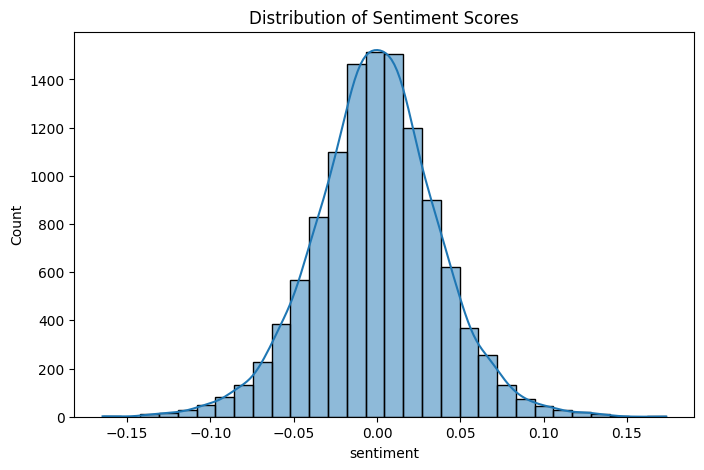

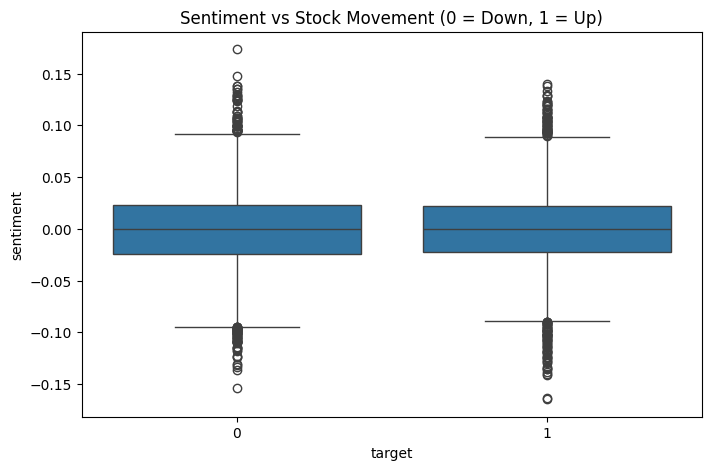

In [ ]:
plt.figure(figsize=(8,5))
sns.histplot(merged['sentiment'], bins=30, kde=True)
plt.title("Distribution of Sentiment Scores")
plt.show()

plt.figure(figsize=(8,5))
sns.boxplot(x='target', y='sentiment', data=merged)
plt.title("Sentiment vs Stock Movement (0 = Down, 1 = Up)")
plt.show()
